# **Import Libraries**

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# **Data Collection**

In [199]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [200]:
# Read data
digits = pd.read_csv('train.csv')

In [201]:
# Display first 5 rows
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


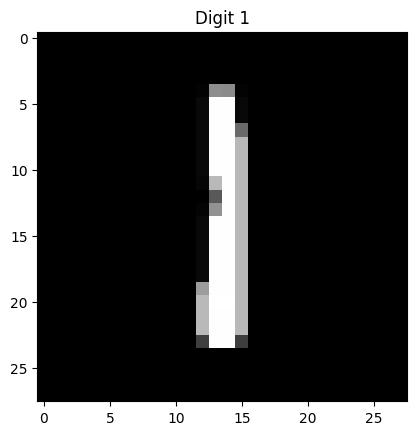

In [203]:
# Example 1
one = digits.iloc[2,1:]
one = one.values.reshape(28,28)
plt.imshow(one, cmap='gray')
plt.title('Digit 1')
plt.show()

In [204]:
X = digits.drop('label', axis=1)
y = digits['label']

In [205]:
# Use StandardScaler to scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Machine Learning**

X_train, X_test, y_train, y_test = This is where the output of the function is assigned. The function returns four outputs:

    X_train: The portion of your features used for training.
    X_test: The portion of your features used for testing.
    y_train: The portion of your target variable corresponding to X_train.
    y_test: The portion of your target variable corresponding to X_test.

test_size=0.8: This parameter specifies the proportion of the dataset to include in the test split. In this case, 80% of the data will be allocated to the testing set.

train_size=0.2: This parameter specifies the proportion of the dataset to include in the training split. Here, 20% of the data will be allocated to the training set.

random_state=101: This parameter controls the shuffling applied to the data before splitting. By setting a specific integer value (like 101), you ensure that the splitting process is reproducible. If you run the code again with the same random_state, you will get the exact same train and test splits. This is useful for debugging and comparing results across different runs.


In [206]:
# Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, train_size=0.2, random_state=101)

In [207]:
# Check data size
print("X_train size;", X_train.shape)
print("y_train size;", y_train.shape)
print("X_test size;", X_test.shape)
print("y_test size;", y_test.shape)

X_train size; (8400, 784)
y_train size; (8400,)
X_test size; (33600, 784)
y_test size; (33600,)


# **Support Vector Machine (SVM)**

**SVM** is a **supervised machine learning algorithm** used primarily for **classification** but also for **regression**.

Its main goal is to **find the best decision boundary (hyperplane)** that separates data points of different classes **with the maximum margin**.

---

## 🌐 SVM with Kernels

SVM can also handle **non-linearly separable** data using something called a **kernel trick**.

### ✅ Common Kernels:

| Kernel    | Use Case                                                              |
| --------- | --------------------------------------------------------------------- |
| `linear`  | When data is linearly separable                                       |
| `rbf`     | Radial Basis Function (Gaussian) – for most non-linear classification |
| `poly`    | Polynomial boundaries                                                 |
| `sigmoid` | Used less often, similar to neural networks                           |

Kernels **transform the data into higher dimensions**, making it possible to find a linear boundary even in complex situations.

---

## 🛠️ SVM Parameters

| Parameter         | Meaning                                                                                                                                            |
| ----------------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| `C`               | Regularization. Smaller `C` → smoother decision boundary (allowing more misclassification); higher `C` → aims to classify training data perfectly. |
| `gamma` (for RBF) | Controls how far the influence of a single training example reaches. High gamma → closer fit to training data.                                     |
| `kernel`          | Type of transformation applied to input data (e.g., `linear`, `rbf`, `poly`).                                                                      |

---

## 📊 Advantages

* Works well in **high-dimensional spaces**
* Effective when the **number of features > number of samples**
* Robust to overfitting in many cases (especially with regularization)

---

## ⚠️ Disadvantages

* **Not efficient on large datasets** (slow training)
* Hard to tune hyperparameters like `C` and `gamma`
* Doesn’t provide **probabilistic outputs** directly (unlike logistic regression)

---

## ✅ Real-World Use Cases

* **OCR** (Optical Character Recognition)
* **Face detection**
* **Text classification / spam filtering**
* **Bioinformatics** (e.g., protein classification, gene analysis)

---

While SVMs with polynomial kernels are powerful, they have limitations. The specific polynomial degree and the regularization parameter (C) chosen through GridSearch might not be the absolute optimal parameters for every single instance in the test set.

In [208]:
# Grid Search for Linear
param_grid_linear = {'C': [0.1, 1, 10, 100]}
grid_search_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=5)
grid_search_linear.fit(X_train, y_train)

print("Best parameters for Linear:", grid_search_linear.best_params_)
print("Best cross-validation score for Linear:", grid_search_linear.best_score_)


Best parameters for Linear: {'C': 0.1}
Best cross-validation score for Linear: 0.9107142857142858


In [209]:
# Linear training and testing
model_linear = SVC(kernel='linear', C=0.1)
model_linear.fit(X_train, y_train)

y_pred_linear = model_linear.predict(X_test)

In [210]:
# RBF training and testing
model_rbf = SVC(kernel='rbf', C=10, gamma=0.01)
model_rbf.fit(X_train, y_train)

y_pred_rbf = model_rbf.predict(X_test)

In [211]:
# Polynomial training and testing
model_poly = SVC(kernel='poly', C=10)
model_poly.fit(X_train, y_train)

y_pred_poly = model_poly.predict(X_test)

### **Accuracy & Classification Report & Confusion Matrix**

In [212]:
accuracy_scores = {
        'Linear': accuracy_score(y_true = y_test, y_pred = y_pred_linear),
        'RBF': accuracy_score(y_true = y_test, y_pred = y_pred_rbf),
        'Poly': accuracy_score(y_true = y_test, y_pred = y_pred_poly)
    }
print("Model Accuracy Comparison:")
for model, accuracy in accuracy_scores.items():
    print(f"{model}: {accuracy:.4f}")

Model Accuracy Comparison:
Linear: 0.9153
RBF: 0.7776
Poly: 0.9507


✅ Accuracy Explanation:

Accuracy is the ratio of correctly predicted samples to the total number of samples:

    Accuracy = Number of Correct Predictions\Total Number of Predictions

The model achieved an accuracy of 91.53% on the test set using the Linear SVM kernel.

The model achieved an accuracy of 77.76% on the test set using the RBF SVM kernel.

The model achieved an accuracy of 95.07% on the test set using the Polynomial SVM kernel.


💡 What does this mean?

    This is a very good result for an OCR (Optical Character Recognition) task using a relatively simple model like Polynomial SVM.

    It shows that the model generalizes well to unseen data and can be considered reliable for most real-world digit recognition applications.

Classification Report

| Metric        | Meaning                                                                  |
| ------------- | ------------------------------------------------------------------------ |
| **Precision** | Correct predictions out of all predicted instances for each class.       |
| **Recall**    | Correct predictions out of all actual instances for each class.          |
| **F1-score**  | Harmonic mean of precision and recall (good overall performance metric). |
| **Support**   | Number of actual occurrences of each class in the test set.              |


In [213]:
print("\nClassification Report_linear: \n", classification_report(y_true = y_test, y_pred = y_pred_linear))


Classification Report_linear: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3285
           1       0.96      0.98      0.97      3760
           2       0.90      0.90      0.90      3343
           3       0.89      0.88      0.89      3475
           4       0.89      0.93      0.91      3290
           5       0.87      0.86      0.87      3039
           6       0.95      0.95      0.95      3277
           7       0.92      0.93      0.92      3504
           8       0.91      0.87      0.89      3272
           9       0.91      0.87      0.89      3355

    accuracy                           0.92     33600
   macro avg       0.91      0.91      0.91     33600
weighted avg       0.92      0.92      0.92     33600

Confusion Matrix_linear: 
 [[3188    0   10    5   11   19   32    3   16    1]
 [   0 3678   14   11    5    7    4    8   30    3]
 [  36   29 3025   54   56   10   30   43   48   12]
 [  14   12  103 3057 

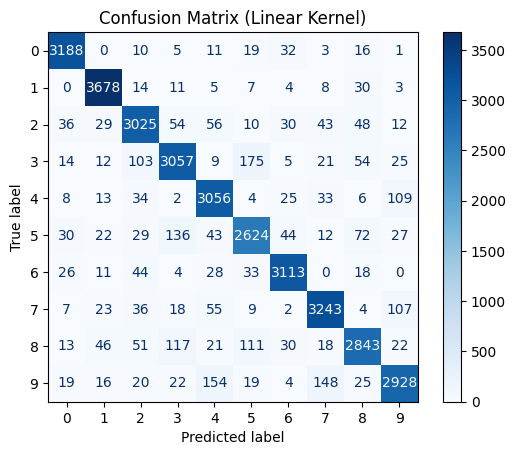

In [237]:
# Calculate the confusion matrix for the linear model
# Make sure y_test and y_pred_linear are defined and available in this scope
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_linear)

# Define class names (0-9 for digits)
class_names = [str(i) for i in range(10)]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Linear Kernel)")

# Ensure the 'results' directory exists if you are saving the image
# Use os.makedirs to create the directory if it doesn't exist
os.makedirs('results', exist_ok=True)
plt.savefig("results/confusion_matrix_linear.png")

📉 Confusion Matrix Analysis

For Linear;

The confusion matrix shows how well the model predicted each digit class compared to the actual labels. Here are the example key observations:
These indicate confusion between classes. Here are notable errors:

    Class 3 (Actual) → Class 5 (Predicted): 175 errors
    Significant confusion here, possibly due to similar patterns or features.

    Class 8 → 3 (117), 5 (111)
    Model struggles to distinguish between these classes.

    Class 9 → 4 (154), 7 (148)
    High confusion between these — their feature vectors may be overlapping.

    Class 2 → 3 (54), 4 (56)
    Indicates a fuzzy boundary between Classes 2, 3, and 4.

In [214]:
print("\nClassification Report_rbf: \n", classification_report(y_true = y_test, y_pred = y_pred_rbf))
print("Confusion Matrix_rbf: \n", confusion_matrix(y_true = y_test, y_pred = y_pred_rbf))


Classification Report_rbf: 
               precision    recall  f1-score   support

           0       0.99      0.78      0.88      3285
           1       0.99      0.96      0.98      3760
           2       0.33      0.98      0.50      3343
           3       0.94      0.67      0.78      3475
           4       0.96      0.74      0.83      3290
           5       0.96      0.67      0.79      3039
           6       0.97      0.74      0.84      3277
           7       0.95      0.69      0.80      3504
           8       0.96      0.73      0.83      3272
           9       0.95      0.78      0.86      3355

    accuracy                           0.78     33600
   macro avg       0.90      0.77      0.81     33600
weighted avg       0.90      0.78      0.81     33600

Confusion Matrix_rbf: 
 [[2577    0  681    1    1    4   13    0    8    0]
 [   0 3615   94   12    8    2    8   10    8    3]
 [   4    0 3291    9    5    2    0    6   26    0]
 [   1    0 1060 2341    1  

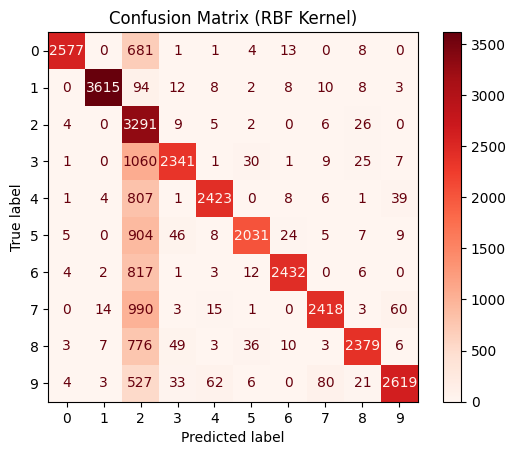

In [239]:
# Calculate the confusion matrix for the linear model
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_rbf)

# Define class names (0-9 for digits)
class_names = [str(i) for i in range(10)]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix (RBF Kernel)")

os.makedirs('results', exist_ok=True)
plt.savefig("results/confusion_matrix_rbf.png")

In [215]:
print("\nClassification Report:_poly\n", classification_report(y_true = y_test, y_pred = y_pred_poly))


Classification Report:_poly
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      3285
           1       0.98      0.98      0.98      3760
           2       0.96      0.92      0.94      3343
           3       0.96      0.94      0.95      3475
           4       0.91      0.97      0.94      3290
           5       0.95      0.94      0.95      3039
           6       0.98      0.96      0.97      3277
           7       0.97      0.93      0.95      3504
           8       0.89      0.96      0.92      3272
           9       0.93      0.93      0.93      3355

    accuracy                           0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600

Confusion Matrix_poly: 
 [[3191    0   13    2   12   14   22    2   28    1]
 [   0 3701    9   13    9    1    5    2   16    4]
 [  17   12 3061   24   53    5    8   31  125    7]
 [   2    3   34 3252    7 

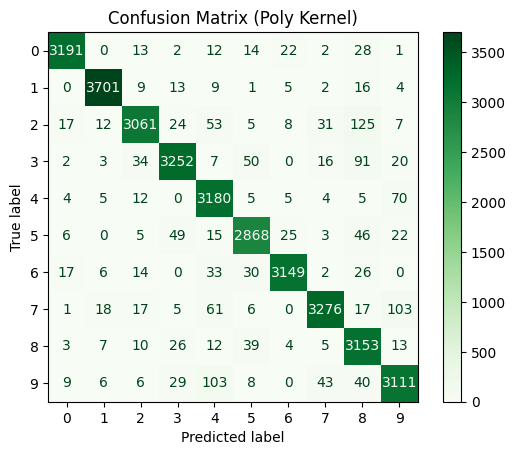

In [240]:
# Calculate the confusion matrix for the poly model
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_poly)

# Define class names (0-9 for digits)
class_names = [str(i) for i in range(10)]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix (Poly Kernel)")

os.makedirs('results', exist_ok=True)
plt.savefig("results/confusion_matrix_poly.png")

# **Predicting Test Data**

In [216]:
# Import libraries
from PIL import Image #
import cv2 # To create image from matris

In [217]:
# Upload data
uploaded = files.upload()

Saving test.csv to test (2).csv


In [218]:
# Read data
digits_test = pd.read_csv('test.csv')

In [219]:
digits_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
#
for i in range(10):
  img = digits_test.iloc[i,0:]
  img = img.values.reshape(28,28)
  cv2.imwrite("Images_" + str(i) + ".png", img)

In [221]:
# Function for reading images
def read_image(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  # Add a check to see if the image was read successfully
  if img is None:
      print(f"Error: Could not read image from {path}")
      return None # Return None or raise an error as appropriate
  img = img.flatten() # Flatten the image to 784 features
  # Reshape to (1, 784) for prediction
  img = img.reshape(1, -1)
  return img

In [222]:
predict_image = read_image('Images_0.png')

In [223]:
# Ensure the image was read successfully before predicting
if predict_image is not None:
  prediction_rbf = model_rbf.predict(predict_image)
  prediction_linear = model_linear.predict(predict_image)
  prediction_poly = model_poly.predict(predict_image)
  print("Prediction:", str(prediction_rbf))
  print("Prediction:", str(prediction_linear))
  print("Prediction:", str(prediction_poly))
else:
  print("Image could not be read, prediction skipped.")

Prediction: [2]
Prediction: [2]
Prediction: [2]


In [224]:
from IPython.display import Image
Image('Images_0.png')

In [225]:
predict_image = read_image('Images_1.png')

In [226]:
# Ensure the image was read successfully before predicting
if predict_image is not None:
  prediction_linear = model_linear.predict(predict_image)
  prediction_rbf = model_rbf.predict(predict_image)
  prediction_poly = model_poly.predict(predict_image)

  print("Prediction_linear:", str(prediction_linear))
  print("Prediction_rbf:", str(prediction_rbf))
  print("Prediction_poly:", str(prediction_poly))
else:
  print("Image could not be read, prediction skipped.")

Prediction_linear: [0]
Prediction_rbf: [2]
Prediction_poly: [0]


In [227]:
Image('Images_1.png')

In [228]:
predict_image = read_image('Images_5.png')

In [229]:
# Ensure the image was read successfully before predicting
if predict_image is not None:
  prediction_linear = model_linear.predict(predict_image)
  prediction_rbf = model_rbf.predict(predict_image)
  prediction_poly = model_poly.predict(predict_image)

  print("Prediction_linear:", str(prediction_linear))
  print("Prediction_rbf:", str(prediction_rbf))
  print("Prediction_poly:", str(prediction_poly))
else:
  print("Image could not be read, prediction skipped.")

Prediction_linear: [7]
Prediction_rbf: [2]
Prediction_poly: [7]


In [230]:
Image('Images_5.png')

In [231]:
predict_image = read_image('Images_9.png')

In [232]:
# Ensure the image was read successfully before predicting
if predict_image is not None:
  prediction_linear = model_linear.predict(predict_image)
  prediction_rbf = model_rbf.predict(predict_image)
  prediction_poly = model_poly.predict(predict_image)

  print("Prediction_linear:", str(prediction_linear))
  print("Prediction_rbf:", str(prediction_rbf))
  print("Prediction_poly:", str(prediction_poly))
else:
  print("Image could not be read, prediction skipped.")

Prediction_linear: [3]
Prediction_rbf: [2]
Prediction_poly: [3]


In [233]:
Image('Images_9.png')